In [3]:
from aqua import Reader

In [4]:
era_reader = Reader(model="ERA5", exp="era5", source="daily")
era_reader

In [5]:
# Show the variables available in the reader

In [6]:
era5_data = era_reader.retrieve()
era5_data

ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
2025-10-08 16:13:45 :: Reader :: WARNING  -> Variable time_bnds has no units!


<xarray.Dataset> Size: 126GB
Dimensions:    (time: 30316, bnds: 2, lon: 1440, lat: 721)
Coordinates:
  * time       (time) datetime64[ns] 243kB 1940-01-01T15:00:00 ... 2022-12-31...
  * lon        (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 485kB dask.array<chunksize=(30, 2), meta=np.ndarray>
    tnlwrf     (time, lat, lon) float32 126GB dask.array<chunksize=(30, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Sat Nov 18 14:40:07 2023: cdo -O -s -f nc4 -z zip -daymean ...
    frequency:    day
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

In [18]:
ar6_all

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]


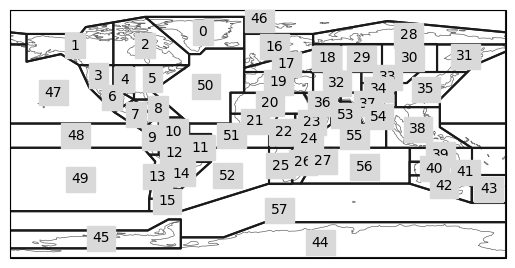

In [6]:
import regionmask
import matplotlib.pyplot as plt

# Load AR6 reference regions (land-only)
ar6_all= regionmask.defined_regions.ar6.all

# Show list of region names
print(ar6_all)

# Plot them on a map
ar6_all.plot()
plt.show()

In [7]:
tnlwrf = era5_data['tnlwrf'].isel(time=0)

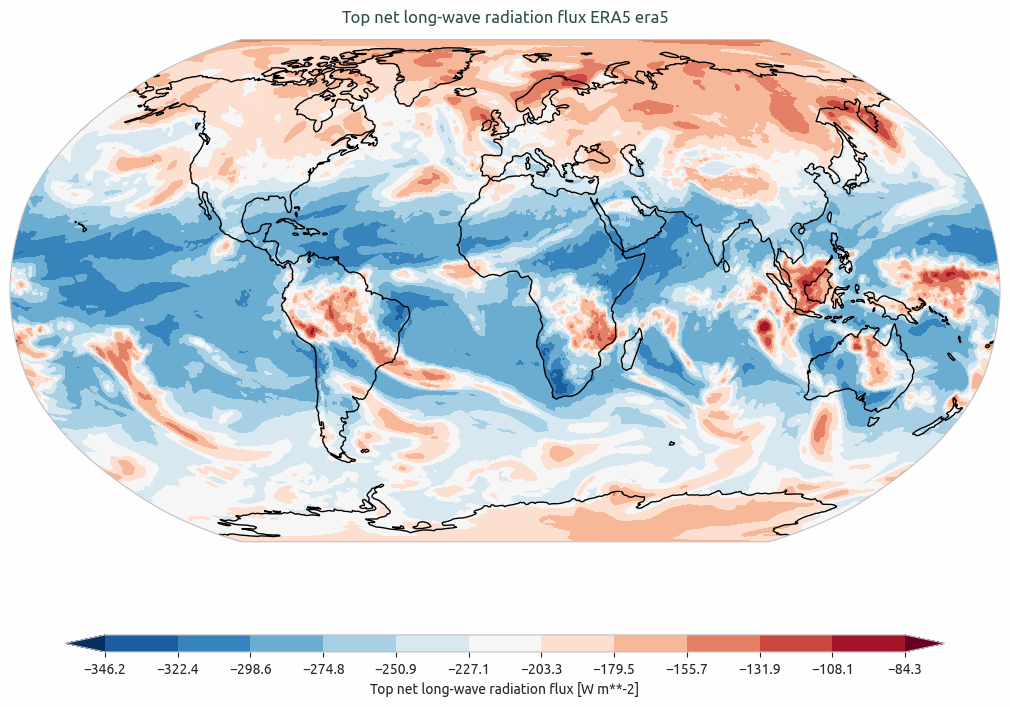

In [8]:
tnlwrf.aqua.plot_single_map()

In [37]:
mask_2D = ar6_all.mask(tnlwrf)

In [17]:
from aqua import Reader, plot_single_map

2025-10-07 17:29:12 :: cbar get label :: WARNING  -> No colorbar label found, please specify one with the cbar_label argument.
2025-10-07 17:29:12 :: set map title :: WARNING  -> No title found, please specify one with the title argument.


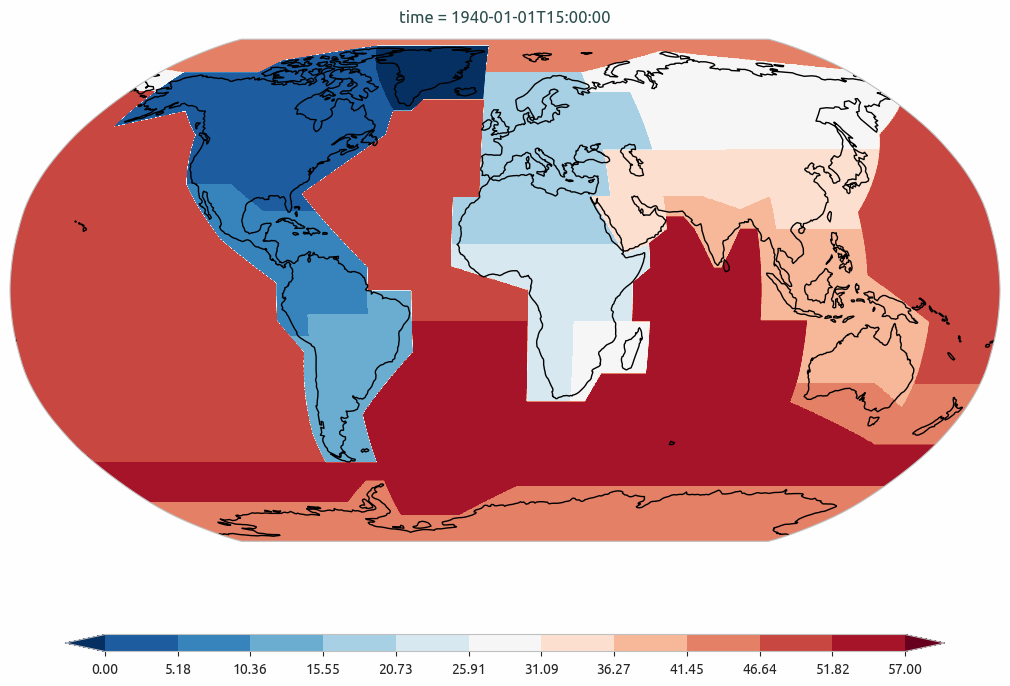

In [38]:
plot_single_map(mask_2D)

In [39]:
mask_2D = ar6_all.mask(tnlwrf)

In [9]:
mask_3D = ar6_all.mask_3D(tnlwrf)
mask_3D

<xarray.DataArray 'mask' (region: 58, lat: 721, lon: 1440)> Size: 60MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]],
      shape=(58, 721, 1440))
Coordinates:
    time     datetime64[ns] 8B 1940-01-01T15:00:00
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * region   (region) int64 464B 0 1 2 3 4 5 6 7 8 ... 50 51 52 53 54 55 56 57
    abbrevs  (region) <U4 928B 'GIC' 'NWN' 'NEN' 'WNA' ... 'EIO' 'SIO' 'SOO'
    names    (region) <U25 6kB 'Greenland/Iceland' ... 'Southern-Ocean'
Attributes:
    standard_name:  region

In [11]:

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

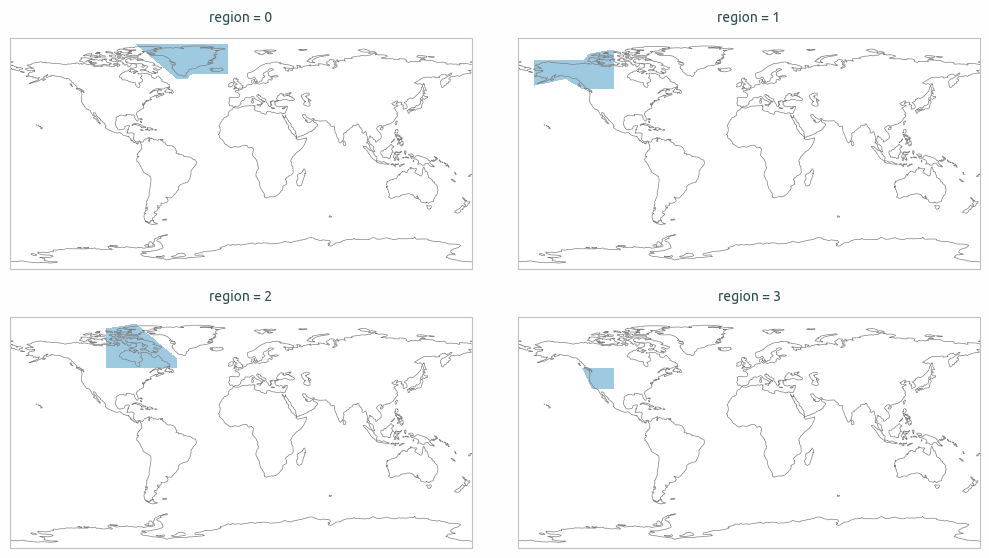

In [12]:
from matplotlib import colors as mplc

cmap1 = mplc.ListedColormap(["none", "#9ecae1"])

fg = mask_3D.isel(region=slice(4)).plot(
    subplot_kws=dict(projection=ccrs.PlateCarree()),
    col="region",
    col_wrap=2,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    aspect=1.5,
    cmap=cmap1,
)

for ax in fg.axes.flatten():
    ax.coastlines(lw=0.5, color="0.5")

fg.fig.subplots_adjust(hspace=0, wspace=0.1);

In [19]:
r1

<xarray.DataArray 'mask' (lat: 721, lon: 1440)> Size: 1MB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(721, 1440))
Coordinates:
    time     datetime64[ns] 8B 1940-01-01T15:00:00
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    region   int64 8B 2
    abbrevs  <U4 16B 'NEN'
    names    <U25 100B 'N.E.North-America'
Attributes:
    standard_name:  region

In [13]:
# 1) by the index of the region:
r1 = mask_3D.sel(region=2)

# 2) with the abbreviation
r2 = mask_3D.isel(region=(mask_3D.abbrevs == "CNA"))

# 3) with the long name:
r3 = mask_3D.isel(region=(mask_3D.names == "C.North-America"))

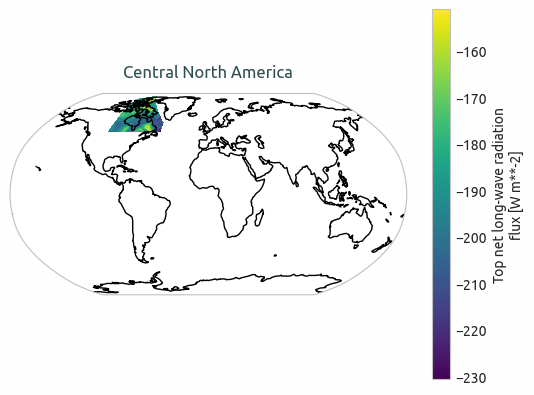

In [15]:
tnlwrf_CNA = tnlwrf.where(r1)

proj = ccrs.Robinson()

ax = plt.subplot(111, projection=proj)

tnlwrf_CNA.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.set_title("Central North America")

ax.coastlines();

In [21]:
import pandas as pd

In [27]:
regular_CORDEX_grids = pd.read_csv('../../ATLAS/notebooks/auxiliary-material/regular-CORDEX-grids.csv', index_col = 1)

In [28]:
regular_CORDEX_grids

,Area,deg,Nlon,Nlat,West,East,South,North
Name,,,,,,,,
NAM-44i,North America,0.500,300,129,-171.7500,-22.2500,12.2500,76.2500
CAM-44i,Central America,0.500,207,111,-124.7500,-21.7500,-19.7500,35.2500
SAM-44i,South America,0.500,181,155,-106.2500,-16.2500,-58.2500,18.7500
ARC-44i,Arctic,0.500,720,83,-179.7500,179.7500,48.7500,89.7500
AFR-44i,Africa,0.500,173,179,-25.2500,60.7500,-46.2500,42.7500
EUR-44i,Europe,0.500,221,103,-44.7500,65.2500,21.7500,72.7500
MED-44i,Mediterranean,0.500,144,65,-20.7500,51.7500,25.2500,57.2500
MNA-44i,Middle East and North Africa,0.500,206,106,-26.7500,75.7500,-7.2500,45.2500
EAS-44i,East Asia,0.500,227,157,62.7500,175.7500,-18.7500,59.2500


In [29]:
ls ../../ATLAS/notebooks/

auxiliary-material/              README.md
bias-adjustment_R.ipynb          reference-grids_R.ipynb
CORDEX-overlaps_Python.ipynb     reference-regions_Python.ipynb
GeoTIFF-post-processing_R.ipynb  reference-regions_R.ipynb
global-warming-levels_R.ipynb    regional-scatter-plots_R.ipynb
hatching-uncertainty_R.ipynb     stripes-plots_R.ipynb
linear-trends_R.ipynb


In [1]:
from aqua.fldstat import AreaSelection

/work/bm1344/a270292/conda/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [12]:
regionmask.defined_regions

<module 'regionmask.defined_regions' from '/work/bm1344/a270292/conda/envs/aqua/lib/python3.12/site-packages/regionmask/defined_regions/__init__.py'>

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]


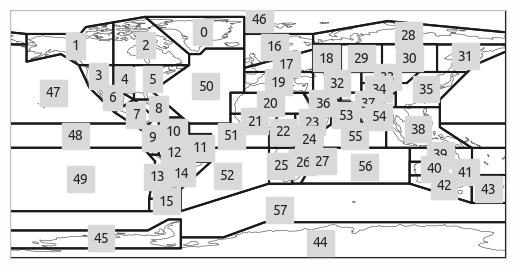

In [10]:
import regionmask
import matplotlib.pyplot as plt

# Load AR6 reference regions (land-only)
ar6_all= regionmask.defined_regions.ar6.all

# Show list of region names
print(ar6_all)

# Plot them on a map
ar6_all.plot()
plt.show()

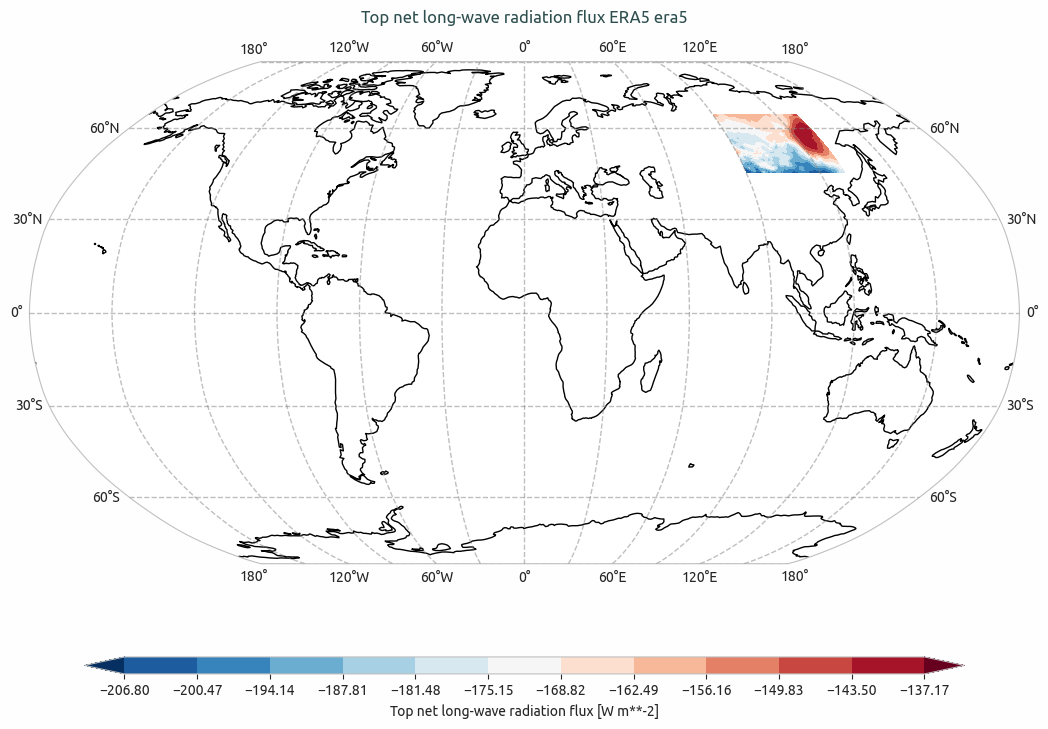

In [9]:
from aqua.fldstat import AreaSelection
import regionmask
import numpy as np
regions = regionmask.defined_regions.ar6.all

ds = era5_data['tnlwrf'].isel(time=0)

sel = AreaSelection()
subset = sel.select_area(ds, region=regions, region_sel=30)

subset.aqua.plot_single_map( gridlines=True)